<a href="https://colab.research.google.com/github/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/blob/main/Actividad_2/Actividad_2_GallardoFelipe_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Felipe Gallardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

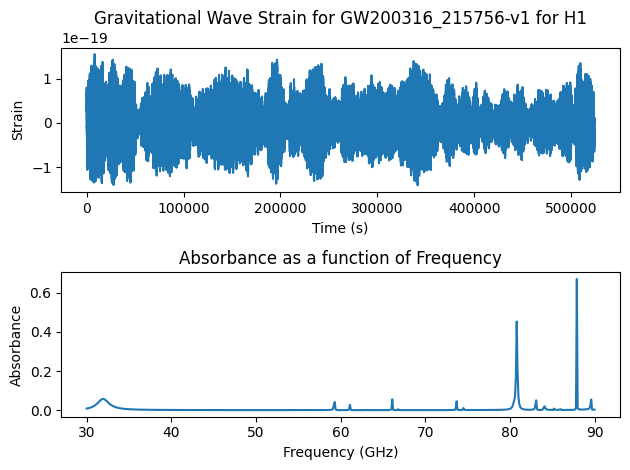

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import scipy.signal as sg
from scipy import interpolate

# URL del archivo .txt
url_txt = 'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt'
url_csv = 'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_2/AbsorbanceTE_0-0.csv'

# Carga de archivos
arch_txt = np.genfromtxt(urlopen(url_txt), skip_header=3)
arch_csv = np.loadtxt(urlopen(url_csv), delimiter=',', skiprows=1)

fig, ax = plt.subplots(2, 1)

# Grafica del archivo .txt
ax[0].plot(arch_txt)
ax[0].set_title('Gravitational Wave Strain for GW200316_215756-v1 for H1')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Strain')

# Grafica del archivo .csv
ax[1].plot(arch_csv[:, 0], arch_csv[:, 1])
ax[1].set_title('Absorbance as a function of Frequency')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Absorbance')

plt.tight_layout()
plt.show()


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


[texto del enlace](https://)

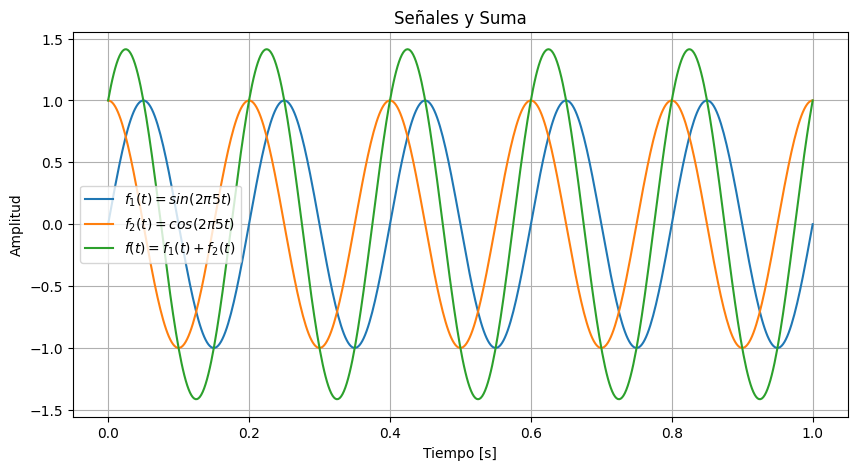

In [203]:
# Definir el tiempo
f = 5
t = np.linspace(0, 1, 500)

# Crear las señales senoidales
señalsen = np.sin(2 * np.pi * f * t)
señalcos = np.cos(2 * np.pi * f * t)

# Sumar las señales
suma_s = señalsen + señalcos

# Graficar las señales
plt.figure(figsize=(10,5))
plt.plot(t, señalsen, label='$f_1(t) = sin(2\pi 5t)$')
plt.plot(t, señalcos, label='$f_2(t) = cos(2\pi 5t)$')
plt.plot(t, suma_s, label='$f(t) = f_1(t) + f_2(t)$')
plt.title('Señales y Suma')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

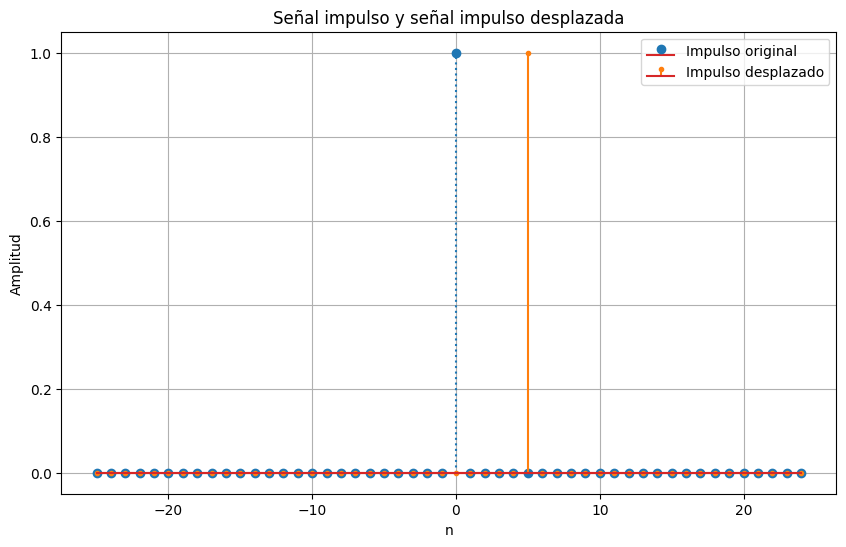

In [205]:
# Crear una señal impulso (delta)
n = np.arange(-25, 25)
impulso = sg.unit_impulse(len(n), 'mid')

# Desplazar la señal impulso
desplazamiento = 5
indice_central = len(n) // 2
impulso_desplazado = sg.unit_impulse(len(n), indice_central + desplazamiento)

# Graficar las señales
plt.figure(figsize=(10, 6))
plt.stem(n, impulso, linefmt='C0:', markerfmt='C0o', label='Impulso original')
plt.stem(n, impulso_desplazado, linefmt='C1-', markerfmt='C1.', label='Impulso desplazado')
plt.title('Señal impulso y señal impulso desplazada')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

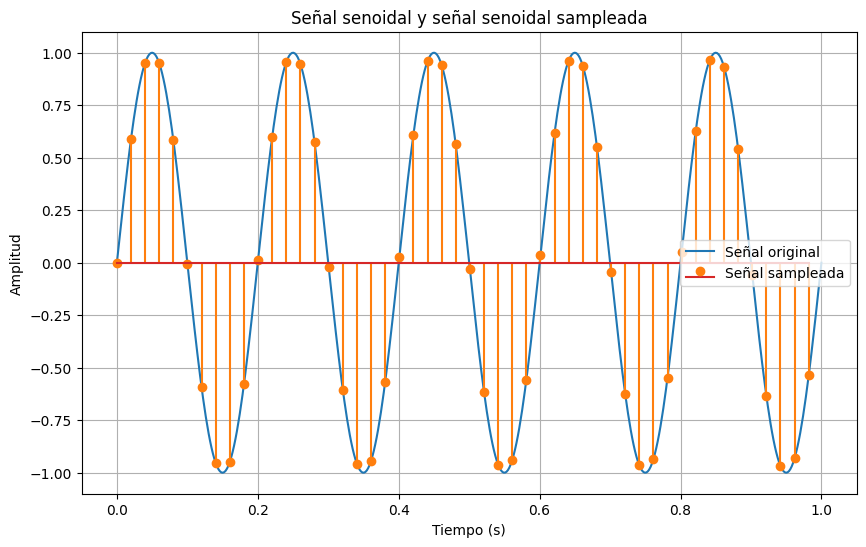

In [206]:
# Parámetros de la señal
f = 5
fs = 10

# Generar la señal senoidal
t = np.linspace(0, 1, 500)
señal = np.sin(2 * np.pi * f * t)

# Realizar la operación de sampleo
señal_sampleada = señal[::fs]

# Graficar la señal original y la señal sampleada
plt.figure(figsize=(10, 6))
plt.plot(t, señal, label='Señal original')
plt.stem(t[::fs], señal_sampleada, linefmt='C1-', markerfmt='C1o', label='Señal sampleada')
plt.title('Señal senoidal y señal senoidal sampleada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.3 Genere una señal Triangular y realice la operación de sampleo

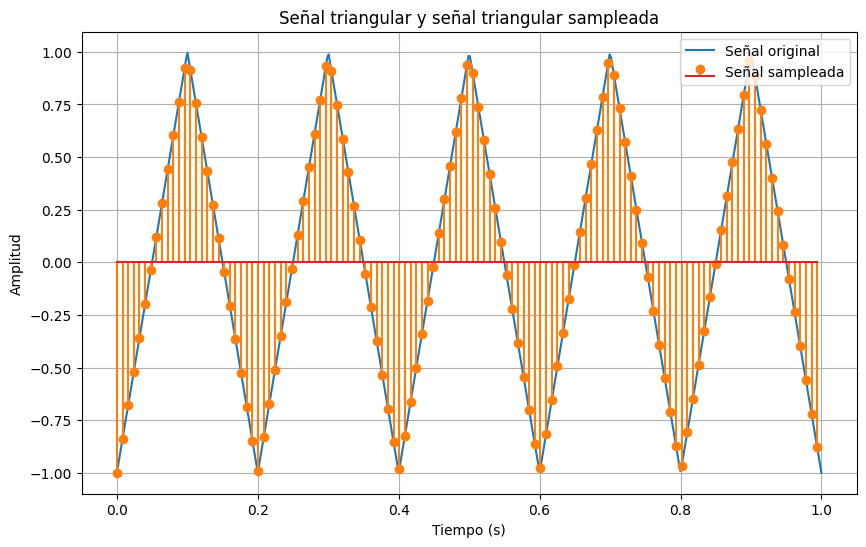

In [211]:
# Parámetros de la señal
fs = 4

# Generar la señal triangular
t = np.linspace(0, 1, 500)
señal = sg.sawtooth(2 * np.pi * 5 * t, 0.5)

# Realizar la operación de sampleo
señal_sampleada = señal[::fs]

# Graficar la señal original y la señal sampleada
plt.figure(figsize=(10, 6))
plt.plot(t, señal, label='Señal original')
plt.stem(t[::fs], señal_sampleada, linefmt='C1-', markerfmt='C1o', label='Señal sampleada')
plt.title('Señal triangular y señal triangular sampleada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

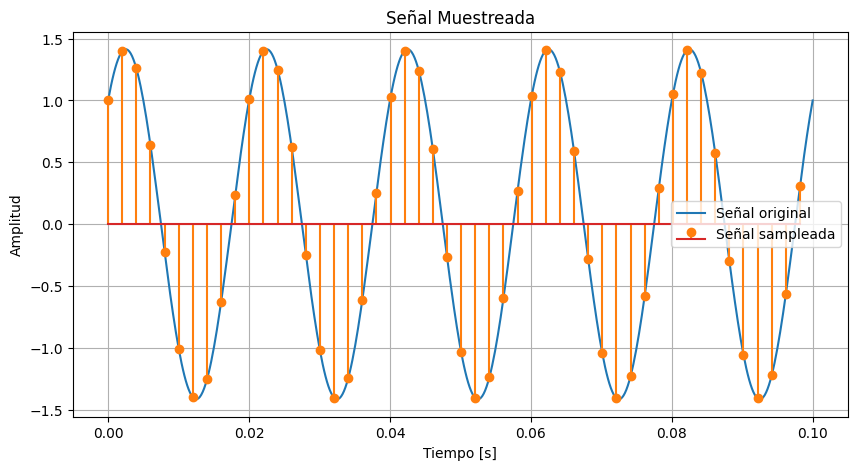

In [182]:
# Definir el factor de muestreo
fs = 10

# Realizar el muestreo
suma_s_muestreada = suma_s[::fs]

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.plot(t, suma_s, label='Señal original')
plt.stem(t[::fs], suma_s_muestreada, linefmt='C1-', markerfmt='C1o', label='Señal sampleada')
plt.title('Señal Muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

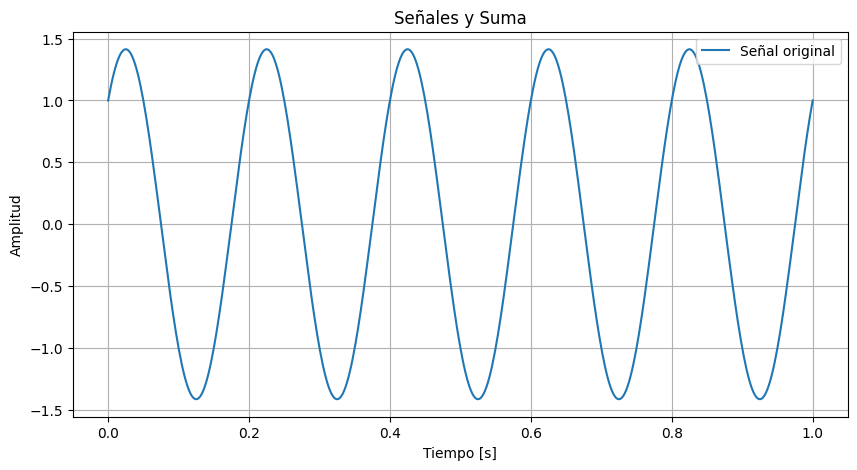

In [142]:
# Grafica señal original
plt.figure(figsize=(10,5))
plt.plot(t, suma_s, label='Señal original')
plt.title('Señales y Suma')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

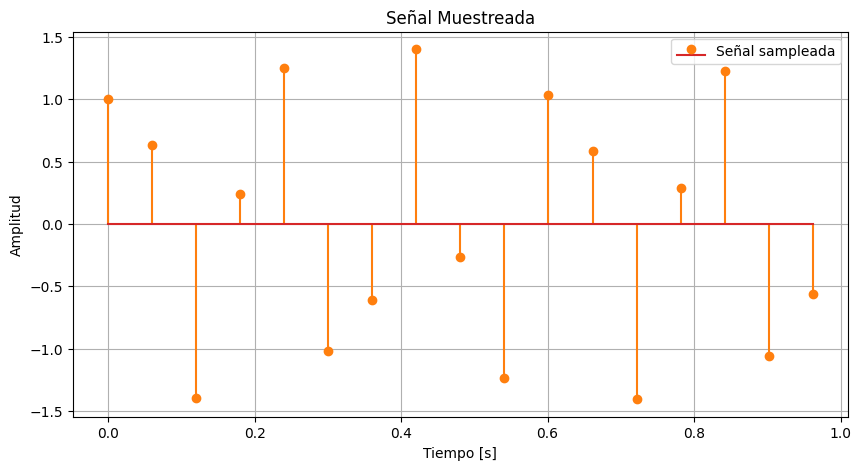

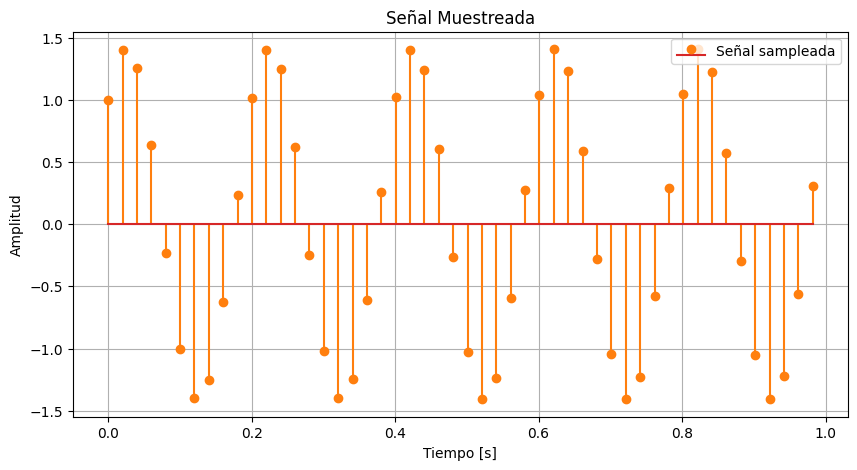

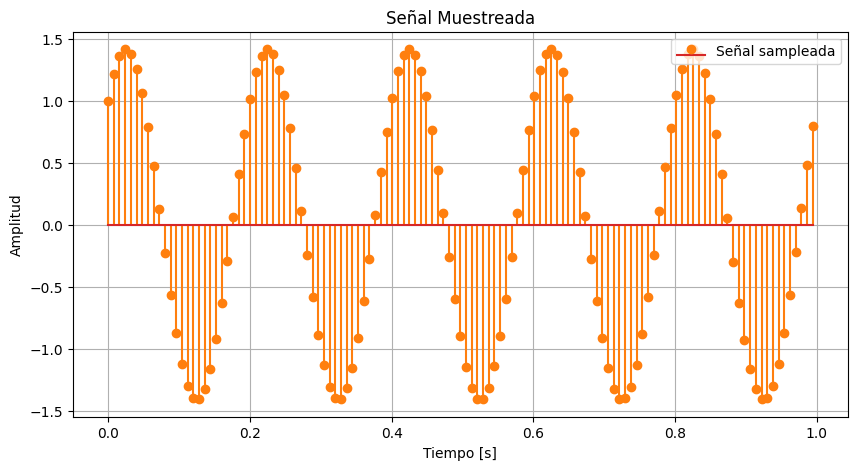

In [213]:
# Parámetros de la señal
fs1 = 30
fs2 = 10
fs3 = 4

# Generar la señal triangular
t = np.linspace(0, 1, 500)

fs = 10

# Realizar el muestreo
suma_s_muestreada = suma_s[::fs1]
suma_s_muestreada2 = suma_s[::fs2]
suma_s_muestreada3 = suma_s[::fs3]

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.stem(t[::fs1], suma_s_muestreada, linefmt='C1-', markerfmt='C1o', label='Señal sampleada')
plt.title('Señal Muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.stem(t[::fs2], suma_s_muestreada2, linefmt='C1-', markerfmt='C1o', label='Señal sampleada')
plt.title('Señal Muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.stem(t[::fs3], suma_s_muestreada3, linefmt='C1-', markerfmt='C1o', label='Señal sampleada')
plt.title('Señal Muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

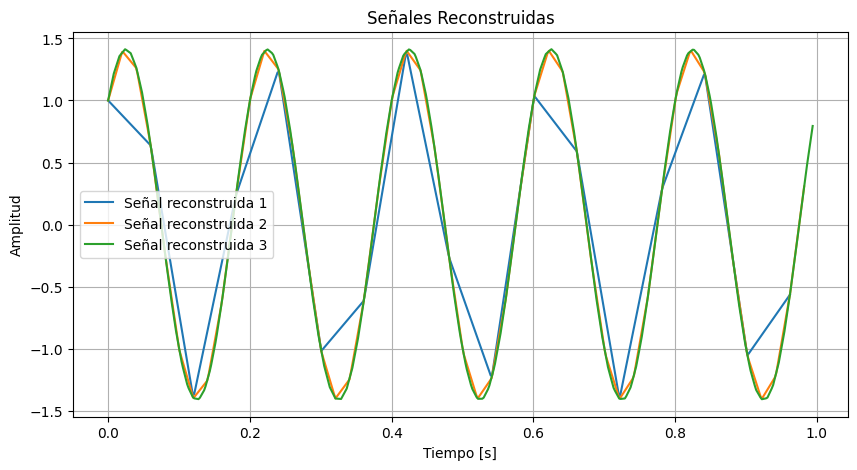

In [214]:
# Interpolación lineal para la primera señal muestreada
f1 = interpolate.interp1d(t[::fs1], suma_s_muestreada, kind='linear')

# Interpolación lineal para la segunda señal muestreada
f2 = interpolate.interp1d(t[::fs2], suma_s_muestreada2, kind='linear')

# Interpolación lineal para la tercera señal muestreada
f3 = interpolate.interp1d(t[::fs3], suma_s_muestreada3, kind='linear')

# Tiempo para las señales reconstruidas
t_new1 = np.linspace(min(t[::fs1]), max(t[::fs1]), 500)
t_new2 = np.linspace(min(t[::fs2]), max(t[::fs2]), 500)
t_new3 = np.linspace(min(t[::fs3]), max(t[::fs3]), 500)

# Señales reconstruidas
suma_s_reconstruida1 = f1(t_new1)
suma_s_reconstruida2 = f2(t_new2)
suma_s_reconstruida3 = f3(t_new3)

# Graficar las señales reconstruidas
plt.figure(figsize=(10, 5))
plt.plot(t_new1, suma_s_reconstruida1, label='Señal reconstruida 1')
plt.plot(t_new2, suma_s_reconstruida2, label='Señal reconstruida 2')
plt.plot(t_new3, suma_s_reconstruida3, label='Señal reconstruida 3')
plt.title('Señales Reconstruidas')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.6 Explica tus hallazgos

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py